#### Data Analysis 

In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime, timedelta

import plotly.offline as pyoff
import plotly.graph_objs as go

pyoff.init_notebook_mode()

In [2]:
df = pd.read_csv("./dataset/Online_Retail.csv",header=0,encoding = 'unicode_escape')

In [3]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID         Country  
0  01-12-2010 08:26       2.55     17850.0  United Kingdom  
1  01-12-2010 08:26       3.39     17850.0  United Kingdom  
2  01-12-2010 08:26       2.75     17850.0  United Kingdom  
3  01-12-2010 08:26       3.39     17850.0  United Kingdom  
4  01-12-2010 08:26       3.39     17850.0  United Kingdom

In [4]:
df.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

In [5]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df.shape

(541909, 10)

#### Revenue = Active Customer Count Order Count Average Revenue per Order

In [8]:
df.InvoiceDate = pd.to_datetime(df.InvoiceDate)

df['InvoiceYearMonth'] = df['InvoiceDate'].map(lambda date: 100*date.year + date.month)

df["Revenue"] = df["Quantity"] * df["UnitPrice"]

df_revenue = df.groupby(['InvoiceYearMonth']).agg({'Revenue': sum}).reset_index()
# tx_revenue = df.groupby(['InvoiceYearMonth'])['Revenue'].sum().reset_index()

df_revenue

InvoiceYearMonth      Revenue
0             201001    58635.560
1             201002    46207.280
2             201003    45620.460
3             201005    31383.950
4             201006    53860.180
5             201007    45059.050
6             201008    44189.840
7             201009    52532.130
8             201010    57404.910
9             201012   314063.660
10            201101   607748.110
11            201102   542511.540
12            201103   712059.510
13            201104   660149.571
14            201105   733769.320
15            201106   745252.340
16            201107   843891.231
17            201108   715632.720
18            201109   992555.452
19            201110   931852.160
20            201111  1297606.420
21            201112   215762.540

#### Monthly revenue visualization

In [10]:
plot_data = [
    go.Scatter(
        x=df_revenue['InvoiceYearMonth'],
        y=df_revenue['Revenue'],
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Monthly Revenue'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [11]:
#using pct_change() function to see monthly percentage change
df_revenue['MonthlyGrowth'] = df_revenue['Revenue'].pct_change()
df_revenue.head()

InvoiceYearMonth   Revenue  MonthlyGrowth
0            201001  58635.56            NaN
1            201002  46207.28      -0.211958
2            201003  45620.46      -0.012700
3            201005  31383.95      -0.312064
4            201006  53860.18       0.716170

#### Monthly growth rate

In [12]:
plot_data = [
    go.Scatter(
        x=df_revenue.query("InvoiceYearMonth < 201112")['InvoiceYearMonth'],
        y=df_revenue.query("InvoiceYearMonth < 201112")['MonthlyGrowth'],
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Monthly Growth Rate'
    )

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

#### Creating monthly active customers dataframe for UK

In [13]:
df_uk = df.query("Country=='United Kingdom'").reset_index(drop=True)
df_uk

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
495473    581585     22466       FAIRY TALE COTTAGE NIGHT LIGHT        12   
495474    581586     22061  LARGE CAKE STAND  HANGING STRAWBERY         8   
495475    581586     23275     SET OF 3 HANGING OWLS OLLIE BEAK        24   
495476    581586     21217        RED RETROSPOT ROUND CAKE TINS        24   
495477    581586     20685                DOORMAT RED RETROSPOT        10   

               InvoiceDate  UnitPrice  CustomerID         Country  \
0      2010-01-12 08:26:00       2.55     17850.0  United Kingdom   
1      2010-01-12 08:26:00       3.39     17850.0  United Kingdom   
2      2010-01-12 08:26:00       2.75     17850.0  United Kingdom   
3      2010-01-12 08:26:00       3.39     17850.0  United Kingdom   
4      2010-01-12 08:26:00       3.39     17850.0  United Kingdom   
...                    ...        ...         ...             ...   
495473 2011-09-12 12:31:00       1.95     15804.0  United Kingdom   
495474 2011-09-12 12:49:00       2.95     13113.0  United Kingdom   
495475 2011-09-12 12:49:00       1.25     13113.0  United Kingdom   
495476 2011-09-12 12:49:00       8.95     13113.0  United Kingdom   
495477 2011-09-12 12:49:00       7.08     13113.0  United Kingdom   

        InvoiceYearMonth  Revenue  
0                 201001    15.30  
1                 201001    20.34  
2                 201001    22.00  
3                 201001    20.34  
4                 201001    20.34  
...                  ...      ...  
495473            201109    23.40  
495474            201109    23.60  
495475            201109    30.00  
495476            201109   214.80  
495477            201109    70.80  

[495478 rows x 10 columns]

In [17]:
df_monthly_active = df_uk.groupby('InvoiceYearMonth')['CustomerID'].nunique().reset_index()
df_monthly_active

InvoiceYearMonth  CustomerID
0             201001          92
1             201002         114
2             201003          43
3             201005          71
4             201006          86
5             201007          67
6             201008         106
7             201009         108
8             201010          51
9             201012         448
10            201101         866
11            201102         772
12            201103         914
13            201104         879
14            201105         958
15            201106        1037
16            201107        1039
17            201108         923
18            201109        1129
19            201110        1226
20            201111        1409
21            201112         382

#### Monthly activate customer

In [18]:
plot_data = [
    go.Bar(
        x=df_monthly_active['InvoiceYearMonth'],
        y=df_monthly_active['CustomerID'],
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Monthly Active Customers'
    )

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [19]:
df_monthly_orders = df_uk.groupby('InvoiceYearMonth')['Quantity'].sum().reset_index()
df_monthly_orders

InvoiceYearMonth  Quantity
0             201001     23949
1             201002     20873
2             201003     10439
3             201005     13604
4             201006     20669
5             201007     23769
6             201008     20086
7             201009     14545
8             201010     18273
9             201012    131894
10            201101    258882
11            201102    241964
12            201103    318157
13            201104    330491
14            201105    359248
15            201106    296586
16            201107    384256
17            201108    309439
18            201109    438391
19            201110    383664
20            201111    547992
21            201112     96658

In [20]:
#Monthly oeder
plot_data = [
    go.Bar(
        x=df_monthly_orders['InvoiceYearMonth'],
        y=df_monthly_orders['Quantity'],
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Monthly Orders'
    )

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

#### Average revenue per order

In [21]:
df_monthly_revenue = df_uk.groupby('InvoiceYearMonth')['Revenue'].mean().reset_index()
df_monthly_revenue

InvoiceYearMonth    Revenue
0             201001  18.519888
1             201002  21.993281
2             201003  19.883362
3             201005  10.213478
4             201006  13.721613
5             201007  14.821822
6             201008  16.118447
7             201009  16.316520
8             201010  19.971320
9             201012  17.354374
10            201101  14.067731
11            201102  15.540675
12            201103  17.955689
13            201104  17.314871
14            201105  16.609902
15            201106  15.732904
16            201107  17.740594
17            201108  15.743069
18            201109  19.098972
19            201110  15.344427
20            201111  16.477433
21            201112  14.562756

In [22]:
plot_data = [
    go.Bar(
        x=df_monthly_revenue['InvoiceYearMonth'],
        y=df_monthly_revenue['Revenue'],
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Monthly Orders'
    )

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [23]:
df_min_purchase = df_uk.groupby('CustomerID')["InvoiceDate"].min().reset_index()
df_min_purchase.columns = ['CustomerID','MinPurchaseDate']
df_min_purchase['MinPurchaseYearMonth'] = df_min_purchase['MinPurchaseDate'].map(lambda date: 100*date.year + date.month)
df_min_purchase

CustomerID     MinPurchaseDate  MinPurchaseYearMonth
0    -9.223372e+18 2010-01-12 11:52:00                201001
1     1.234600e+04 2011-01-18 10:01:00                201101
2     1.274700e+04 2010-05-12 15:38:00                201005
3     1.274800e+04 2010-01-12 12:48:00                201001
4     1.274900e+04 2011-01-08 12:48:00                201101
...            ...                 ...                   ...
3946  1.828000e+04 2011-07-03 09:52:00                201107
3947  1.828100e+04 2011-12-06 10:53:00                201112
3948  1.828200e+04 2011-02-12 11:43:00                201102
3949  1.828300e+04 2011-01-23 14:58:00                201101
3950  1.828700e+04 2011-05-22 10:39:00                201105

[3951 rows x 3 columns]

In [24]:
df_uk = pd.merge(df_uk, df_min_purchase, on="CustomerID")
df_uk.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  \
0 2010-01-12 08:26:00       2.55     17850.0  United Kingdom   
1 2010-01-12 08:26:00       3.39     17850.0  United Kingdom   
2 2010-01-12 08:26:00       2.75     17850.0  United Kingdom   
3 2010-01-12 08:26:00       3.39     17850.0  United Kingdom   
4 2010-01-12 08:26:00       3.39     17850.0  United Kingdom   

   InvoiceYearMonth  Revenue     MinPurchaseDate  MinPurchaseYearMonth  
0            201001    15.30 2010-01-12 08:26:00                201001  
1            201001    20.34 2010-01-12 08:26:00                201001  
2            201001    22.00 2010-01-12 08:26:00                201001  
3            201001    20.34 2010-01-12 08:26:00                201001  
4            201001    20.34 2010-01-12 08:26:00                201001

In [25]:
df_uk['UserType'] = 'New'
df_uk.loc[df_uk['InvoiceYearMonth']>df_uk['MinPurchaseYearMonth'],'UserType'] = 'Existing'

In [26]:
df_user_type_revenue = df_uk.groupby(['InvoiceYearMonth','UserType'])['Revenue'].sum().reset_index()
#remove december month due to incomplete data in that month
df_user_type_revenue = df_user_type_revenue.query("InvoiceYearMonth != 201012 and InvoiceYearMonth != 201112")
df_user_type_revenue

InvoiceYearMonth  UserType      Revenue
0             201001       New    54615.150
1             201002  Existing     5218.470
2             201002       New    40835.460
3             201003  Existing    24481.940
4             201003       New    15503.500
5             201005  Existing     3159.450
6             201005       New    22302.750
7             201006  Existing    32213.280
8             201006       New    20189.560
9             201007  Existing    -1124.840
10            201007       New    43426.320
11            201008  Existing    11799.600
12            201008       New    28367.570
13            201009  Existing    25272.360
14            201009       New    17721.670
15            201010  Existing    39334.000
16            201010       New    13170.600
19            201101  Existing   285358.880
20            201101       New   182758.930
21            201102  Existing   309955.610
22            201102       New   141703.040
23            201103  Existing   468032.550
24            201103       New   136176.380
25            201104  Existing   494466.840
26            201104       New   105978.251
27            201105  Existing   516626.140
28            201105       New    84104.170
29            201106  Existing   538003.800
30            201106       New    64110.160
31            201107  Existing   620940.110
32            201107       New    82030.931
33            201108  Existing   549047.650
34            201108       New    52479.280
35            201109  Existing   747813.031
36            201109       New    95941.371
37            201110  Existing   676198.620
38            201110       New    79621.800
39            201111  Existing  1042606.030
40            201111       New    72405.400

In [27]:
plot_data = [
    go.Scatter(
        x=df_user_type_revenue.query("UserType == 'Existing'")['InvoiceYearMonth'],
        y=df_user_type_revenue.query("UserType == 'Existing'")['Revenue'],
        name = 'Existing'
    ),
    go.Scatter(
        x=df_user_type_revenue.query("UserType == 'New'")['InvoiceYearMonth'],
        y=df_user_type_revenue.query("UserType == 'New'")['Revenue'],
        name = 'New'
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='New vs Existing'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

#### New Customer ratio

In [28]:
df_user_ratio = df_uk.query("UserType == 'New'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique()/df_uk.query("UserType == 'Existing'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique() 
df_user_ratio = df_user_ratio.reset_index()
df_user_ratio = df_user_ratio.dropna()
df_user_ratio

InvoiceYearMonth  CustomerID
1             201002   11.666667
2             201003    7.600000
3             201005    7.875000
4             201006    5.142857
5             201007    3.187500
6             201008    3.608696
7             201009    1.918919
8             201010    2.400000
9             201012    1.395722
10            201101    1.577381
11            201102    0.939698
12            201103    0.718045
13            201104    0.510309
14            201105    0.349296
15            201106    0.302764
16            201107    0.245803
17            201108    0.183333
18            201109    0.236583
19            201110    0.221116
20            201111    0.166391
21            201112    0.055249

In [29]:
plot_data = [
    go.Bar(
        x=df_user_ratio.query("InvoiceYearMonth>201101 and InvoiceYearMonth<201112")['InvoiceYearMonth'],
        y=df_user_ratio.query("InvoiceYearMonth>201101 and InvoiceYearMonth<201112")['CustomerID'],
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='New Customer Ratio'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

#### Monthly Retention Rate
Monthly Retention Rate = Retained Customers From Prev. Month/Active Customers Total

In [30]:
df_user_purchase = df_uk.groupby(['CustomerID','InvoiceYearMonth'])['Revenue'].sum().reset_index()
df_user_purchase

CustomerID  InvoiceYearMonth   Revenue
0     -9.223372e+18            201001  12584.30
1     -9.223372e+18            201002    431.85
2     -9.223372e+18            201003  22473.00
3     -9.223372e+18            201005      3.35
4     -9.223372e+18            201006  23395.10
...             ...               ...       ...
12715  1.828300e+04            201110    228.95
12716  1.828300e+04            201111    537.26
12717  1.828700e+04            201105    765.28
12718  1.828700e+04            201110     70.68
12719  1.828700e+04            201112   1001.32

[12720 rows x 3 columns]

In [31]:
df_retention = pd.crosstab(df_user_purchase['CustomerID'], df_user_purchase['InvoiceYearMonth']).reset_index()
df_retention.head()

InvoiceYearMonth    CustomerID  201001  201002  201003  201005  201006  \
0                -9.223372e+18       1       1       1       1       1   
1                 1.234600e+04       0       0       0       0       0   
2                 1.274700e+04       0       0       0       1       0   
3                 1.274800e+04       1       1       0       1       1   
4                 1.274900e+04       0       0       0       0       0   

InvoiceYearMonth  201007  201008  201009  201010  ...  201103  201104  201105  \
0                      1       1       1       1  ...       1       1       1   
1                      0       0       0       0  ...       0       0       0   
2                      0       0       0       0  ...       0       1       1   
3                      1       1       1       1  ...       1       1       1   
4                      0       0       0       0  ...       0       0       1   

InvoiceYearMonth  201106  201107  201108  201109  201110  201111  201112  
0                      1       1       1       1       1       1       1  
1                      0       0       0       0       0       0       0  
2                      1       1       1       0       0       1       0  
3                      1       1       1       1       1       1       1  
4                      1       0       1       0       1       1       0  

[5 rows x 23 columns]

In [32]:
months = df_retention.columns[2:]
months

Index([201002, 201003, 201005, 201006, 201007, 201008, 201009, 201010, 201012,
       201101, 201102, 201103, 201104, 201105, 201106, 201107, 201108, 201109,
       201110, 201111, 201112],
      dtype='object', name='InvoiceYearMonth')

In [33]:
retention_array = []
for i in range(len(months)-1):
    retention_data = {}
    selected_month = months[i+1]
    prev_month = months[i]
    retention_data['InvoiceYearMonth'] = int(selected_month)
    retention_data['TotalUserCount'] = df_retention[selected_month].sum()
    retention_data['RetainedUserCount'] = df_retention[(df_retention[selected_month]>0) & (df_retention[prev_month]>0)][selected_month].sum()
    retention_array.append(retention_data)
    
retention_array

[{'InvoiceYearMonth': 201003, 'TotalUserCount': 43, 'RetainedUserCount': 3},
 {'InvoiceYearMonth': 201005, 'TotalUserCount': 71, 'RetainedUserCount': 2},
 {'InvoiceYearMonth': 201006, 'TotalUserCount': 86, 'RetainedUserCount': 5},
 {'InvoiceYearMonth': 201007, 'TotalUserCount': 67, 'RetainedUserCount': 4},
 {'InvoiceYearMonth': 201008, 'TotalUserCount': 106, 'RetainedUserCount': 6},
 {'InvoiceYearMonth': 201009, 'TotalUserCount': 108, 'RetainedUserCount': 8},
 {'InvoiceYearMonth': 201010, 'TotalUserCount': 51, 'RetainedUserCount': 4},
 {'InvoiceYearMonth': 201012, 'TotalUserCount': 448, 'RetainedUserCount': 20},
 {'InvoiceYearMonth': 201101, 'TotalUserCount': 866, 'RetainedUserCount': 200},
 {'InvoiceYearMonth': 201102, 'TotalUserCount': 772, 'RetainedUserCount': 289},
 {'InvoiceYearMonth': 201103, 'TotalUserCount': 914, 'RetainedUserCount': 295},
 {'InvoiceYearMonth': 201104, 'TotalUserCount': 879, 'RetainedUserCount': 324},
 {'InvoiceYearMonth': 201105, 'TotalUserCount': 958, 'Retain

In [34]:
df_retention = pd.DataFrame(retention_array)
df_retention.head()

InvoiceYearMonth  TotalUserCount  RetainedUserCount
0            201003              43                  3
1            201005              71                  2
2            201006              86                  5
3            201007              67                  4
4            201008             106                  6

#### Monthly Retention Rate = Retained Customers From Prev. Month / Active Customers Total

In [35]:
df_retention['RetentionRate'] = df_retention['RetainedUserCount']/df_retention['TotalUserCount']
df_retention

InvoiceYearMonth  TotalUserCount  RetainedUserCount  RetentionRate
0             201003              43                  3       0.069767
1             201005              71                  2       0.028169
2             201006              86                  5       0.058140
3             201007              67                  4       0.059701
4             201008             106                  6       0.056604
5             201009             108                  8       0.074074
6             201010              51                  4       0.078431
7             201012             448                 20       0.044643
8             201101             866                200       0.230947
9             201102             772                289       0.374352
10            201103             914                295       0.322757
11            201104             879                324       0.368601
12            201105             958                360       0.375783
13            201106            1037                382       0.368370
14            201107            1039                428       0.411935
15            201108             923                416       0.450704
16            201109            1129                385       0.341010
17            201110            1226                465       0.379282
18            201111            1409                566       0.401703
19            201112             382                206       0.539267

In [36]:
plot_data = [
    go.Scatter(
        x=df_retention.query("InvoiceYearMonth<201112")['InvoiceYearMonth'],
        y=df_retention.query("InvoiceYearMonth<201112")['RetentionRate'],
        name="organic"
    )
    
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Monthly Retention Rate'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

#### Cohort Based Retention Rate

In [37]:
df_retention = pd.crosstab(df_user_purchase['CustomerID'], df_user_purchase['InvoiceYearMonth']).reset_index()

new_column_names = [ 'm_' + str(column) for column in df_retention.columns]
df_retention.columns = new_column_names

In [38]:
retention_array = []
for i in range(len(months)):
    retention_data = {}
    selected_month = months[i]
    prev_months = months[:i]
    next_months = months[i+1:]
    for prev_month in prev_months:
        retention_data[prev_month] = np.nan
        
    total_user_count =  retention_data['TotalUserCount'] = df_retention['m_' + str(selected_month)].sum()
    retention_data[selected_month] = 1 
    
    query = "{} > 0".format('m_' + str(selected_month))
    

    for next_month in next_months:
        query = query + " and {} > 0".format(str('m_' + str(next_month)))
        retention_data[next_month] = np.round(df_retention.query(query)['m_' + str(next_month)].sum()/total_user_count,2)
    retention_array.append(retention_data)
    
df_retention = pd.DataFrame(retention_array)
df_retention.index = months

In [39]:
df_retention

TotalUserCount  201002  201003  201005  201006  201007  \
InvoiceYearMonth                                                           
201002                       114     1.0    0.03    0.01    0.01    0.01   
201003                        43     NaN    1.00    0.05    0.02    0.02   
201005                        71     NaN     NaN    1.00    0.07    0.03   
201006                        86     NaN     NaN     NaN    1.00    0.05   
201007                        67     NaN     NaN     NaN     NaN    1.00   
201008                       106     NaN     NaN     NaN     NaN     NaN   
201009                       108     NaN     NaN     NaN     NaN     NaN   
201010                        51     NaN     NaN     NaN     NaN     NaN   
201012                       448     NaN     NaN     NaN     NaN     NaN   
201101                       866     NaN     NaN     NaN     NaN     NaN   
201102                       772     NaN     NaN     NaN     NaN     NaN   
201103                       914     NaN     NaN     NaN     NaN     NaN   
201104                       879     NaN     NaN     NaN     NaN     NaN   
201105                       958     NaN     NaN     NaN     NaN     NaN   
201106                      1037     NaN     NaN     NaN     NaN     NaN   
201107                      1039     NaN     NaN     NaN     NaN     NaN   
201108                       923     NaN     NaN     NaN     NaN     NaN   
201109                      1129     NaN     NaN     NaN     NaN     NaN   
201110                      1226     NaN     NaN     NaN     NaN     NaN   
201111                      1409     NaN     NaN     NaN     NaN     NaN   
201112                       382     NaN     NaN     NaN     NaN     NaN   

                  201008  201009  201010  201012  ...  201103  201104  201105  \
InvoiceYearMonth                                  ...                           
201002              0.01    0.01    0.01    0.01  ...    0.01    0.01    0.01   
201003              0.02    0.02    0.02    0.02  ...    0.02    0.02    0.02   
201005              0.03    0.03    0.03    0.03  ...    0.03    0.03    0.03   
201006              0.02    0.02    0.02    0.02  ...    0.02    0.02    0.02   
201007              0.09    0.03    0.03    0.03  ...    0.03    0.03    0.03   
201008              1.00    0.08    0.02    0.02  ...    0.02    0.02    0.02   
201009               NaN    1.00    0.04    0.04  ...    0.02    0.02    0.02   
201010               NaN     NaN    1.00    0.39  ...    0.10    0.08    0.08   
201012               NaN     NaN     NaN    1.00  ...    0.18    0.14    0.12   
201101               NaN     NaN     NaN     NaN  ...    0.20    0.13    0.11   
201102               NaN     NaN     NaN     NaN  ...    0.38    0.22    0.16   
201103               NaN     NaN     NaN     NaN  ...    1.00    0.35    0.22   
201104               NaN     NaN     NaN     NaN  ...     NaN    1.00    0.41   
201105               NaN     NaN     NaN     NaN  ...     NaN     NaN    1.00   
201106               NaN     NaN     NaN     NaN  ...     NaN     NaN     NaN   
201107               NaN     NaN     NaN     NaN  ...     NaN     NaN     NaN   
201108               NaN     NaN     NaN     NaN  ...     NaN     NaN     NaN   
201109               NaN     NaN     NaN     NaN  ...     NaN     NaN     NaN   
201110               NaN     NaN     NaN     NaN  ...     NaN     NaN     NaN   
201111               NaN     NaN     NaN     NaN  ...     NaN     NaN     NaN   
201112               NaN     NaN     NaN     NaN  ...     NaN     NaN     NaN   

                  201106  201107  201108  201109  201110  201111  201112  
InvoiceYearMonth                                                          
201002              0.01    0.01    0.01    0.01    0.01    0.01    0.01  
201003              0.02    0.02    0.02    0.02    0.02    0.02    0.02  
201005              0.03    0.03    0.03    0.03    0.03    0.03    0.03  
201006              0.02    0.

#### K-Means Clustering 

In [40]:
#Load Dataset
TextFileReader = pd.read_csv("./dataset/Online_Retail.csv",engine='python', chunksize=100000)  # the number of rows per chunk

DS = []
for df in TextFileReader:
    DS.append(df)

df = pd.concat(DS,sort=False)

In [41]:
DS_2 = DS[0]
print (DS_2.columns)
DS_2.head(10)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

        InvoiceDate  UnitPrice  CustomerID         Country  
0  01-12-2010 08:26       2.55     17850.0  United Kingdom  
1  01-12-2010 08:26       3.39     17850.0  United Kingdom  
2  01-12-2010 08:26       2.75     17850.0  United Kingdom  
3  01-12-2010 08:26       3.39     17850.0  United Kingdom  
4  01-12-2010 08:26       3.39     17850.0  United Kingdom  
5  01-12-2010 08:26       7.65     17850.0  United Kingdom  
6  01-12-2010 08:26       4.25     17850.0  United Kingdom  
7  01-12-2010 08:28       1.85     17850.0  United Kingdom  
8  01-12-2010 08:28       1.85     17850.0  United Kingdom  
9  01-12-2010 08:34       1.69     13047.0  United Kingdom

In [42]:
#Some data Stats
DS_2.shape # Shape
DS_2.info() # information
DS_2.describe() #Summary Stastics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    100000 non-null  object 
 1   StockCode    100000 non-null  object 
 2   Description  99701 non-null   object 
 3   Quantity     100000 non-null  int64  
 4   InvoiceDate  100000 non-null  object 
 5   UnitPrice    100000 non-null  float64
 6   CustomerID   65085 non-null   float64
 7   Country      100000 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 6.1+ MB


Quantity      UnitPrice    CustomerID
count  100000.00000  100000.000000  65085.000000
mean        8.89292       5.396608  15351.001583
std       336.56270     120.891000   1769.756387
min    -74215.00000       0.000000  12346.000000
25%         1.00000       1.250000  13869.000000
50%         3.00000       2.510000  15311.000000
75%         8.00000       4.250000  16997.000000
max     74215.00000   16888.020000  18283.000000

In [43]:
#Looking out for missing values and handling them
DS_2.isnull().sum()

InvoiceNo          0
StockCode          0
Description      299
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     34915
Country            0
dtype: int64

In [44]:
#finding out unique variables
print("Description : ",DS_2.Description.unique())
print("Country  : ",DS_2.Country.unique())

Description :  ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'SCALLOP SHELL SOAP DISH'
 'PINK RIVIERA HANDBAG' 'TOP SECRET PEN SET']
Country  :  ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates']


In [45]:
# using Pandas function to_numeric to check if there is other value than number it will convert into Nan
DS_2['InvoiceNo'] = pd.to_numeric(DS_2['InvoiceNo'], errors='coerce')

DS_2.isnull().sum()

InvoiceNo       1870
StockCode          0
Description      299
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     34915
Country            0
dtype: int64

In [46]:
# using Pandas function to_numeric to check if there is other value than number it will convert into Nan

DS_2['StockCode'] = pd.to_numeric(DS_2['StockCode'], errors='coerce')
DS_2.isnull().sum()

InvoiceNo       1870
StockCode      13461
Description      299
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     34915
Country            0
dtype: int64

In [47]:
# replace the matching strings 
DS_2['Description'] = DS_2['Description'].replace('lost', np.NaN)
DS_2.isnull().sum()

InvoiceNo       1870
StockCode      13461
Description      299
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     34915
Country            0
dtype: int64

In [48]:
# Applying abs() to Quantity column which will change negative values to positive 
DS_2['Quantity'] = DS_2['Quantity'].abs()

In [49]:
# Applying abs() to UnitPrice column which will change negative values to positive 
DS_2['UnitPrice'] = DS_2['UnitPrice'].abs() 

In [50]:
#Filling Values with mode in all Categorical columns which have NaN values in it
stringcols = DS_2.select_dtypes(exclude=np.number)
for cat in stringcols:
    DS_2[cat] = DS_2[cat].fillna(DS_2[cat].mode().values[0])
DS_2.isnull().sum()

InvoiceNo       1870
StockCode      13461
Description        0
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     34915
Country            0
dtype: int64

In [51]:
#Changing Datatype of InvoiceDate to_datetime 
DS_2['InvoiceDate'] = pd.to_datetime(DS_2['InvoiceDate'])

In [52]:
#Filling Values with mean in all number columns which have NaN values in it
numcols = DS_2.select_dtypes(include=np.number)
for cat in numcols:
    DS_2[cat] = DS_2[cat].fillna(DS_2[cat].median())
DS_2.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [53]:
#label encoder
from numpy import array
from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()
DS_2['DescriptionCode']=label_encoder.fit_transform(DS_2.Description)
DS_2.head()

InvoiceNo  StockCode                          Description  Quantity  \
0   536365.0    22348.0   WHITE HANGING HEART T-LIGHT HOLDER         6   
1   536365.0    71053.0                  WHITE METAL LANTERN         6   
2   536365.0    22348.0       CREAM CUPID HEARTS COAT HANGER         8   
3   536365.0    22348.0  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4   536365.0    22348.0       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  DescriptionCode  
0 2010-01-12 08:26:00       2.55     17850.0  United Kingdom             2910  
1 2010-01-12 08:26:00       3.39     17850.0  United Kingdom             2917  
2 2010-01-12 08:26:00       2.75     17850.0  United Kingdom              732  
3 2010-01-12 08:26:00       3.39     17850.0  United Kingdom             1453  
4 2010-01-12 08:26:00       3.39     17850.0  United Kingdom             2237

#### Visualize

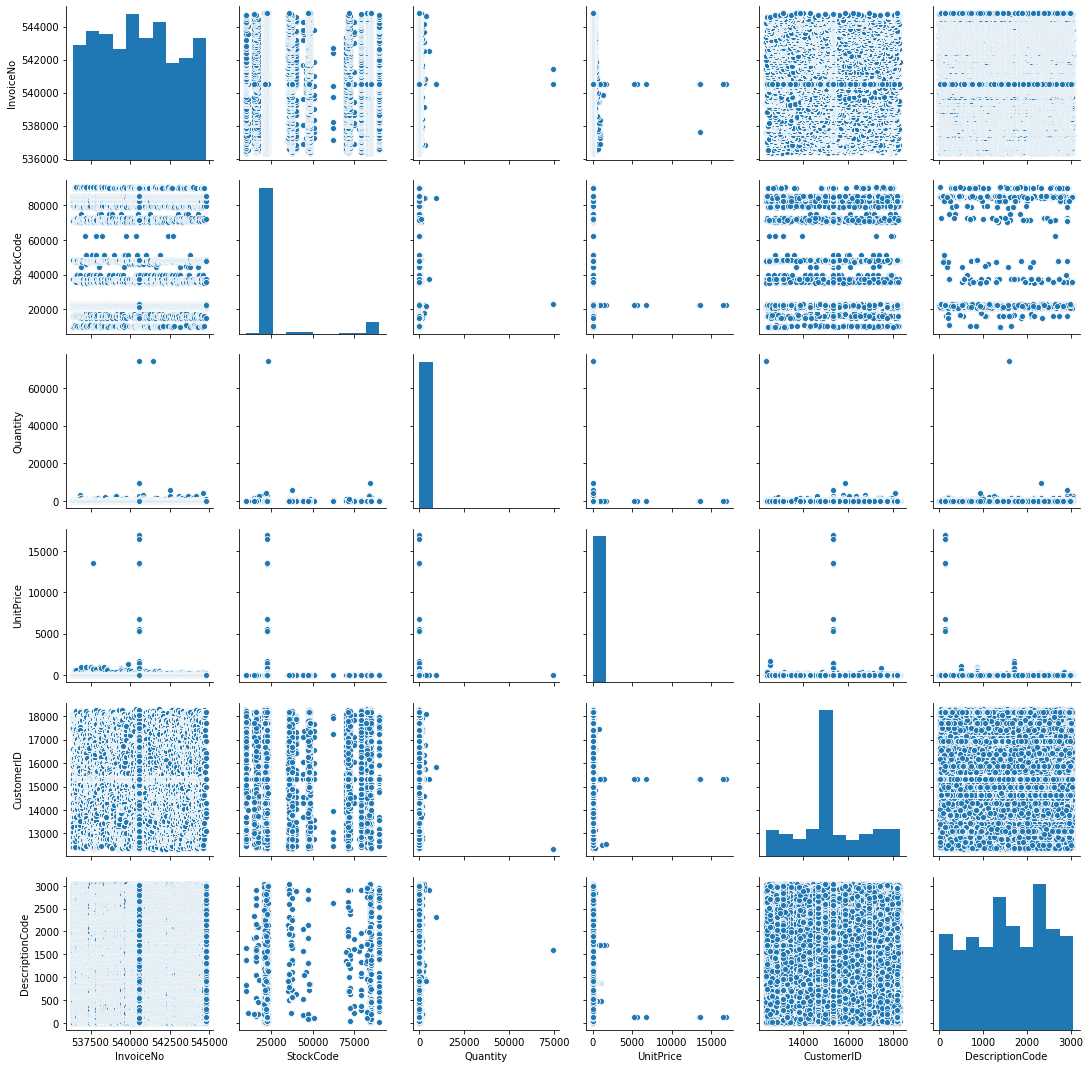

In [54]:
sns.pairplot(DS_2)

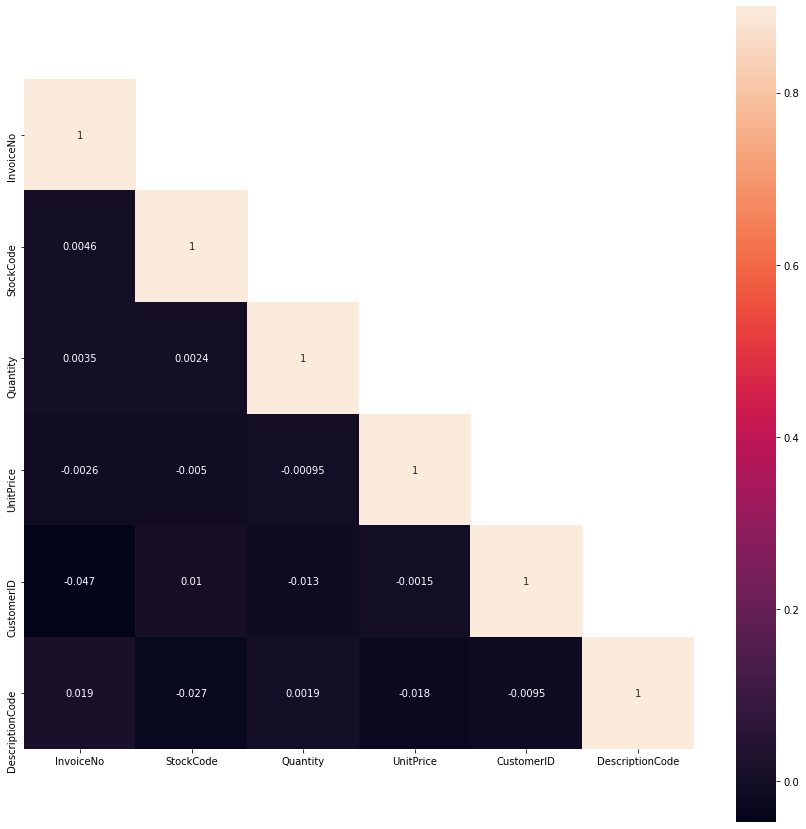

In [55]:
#create correlation
corr = DS_2.corr(method = 'pearson')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(15,15)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

In [56]:
DS_2_cluster = pd.DataFrame()
DS_2_cluster['Quantity'] = DS_2['Quantity']
DS_2_cluster['UnitPrice'] = DS_2['UnitPrice']
DS_2_cluster['DescriptionCode'] = DS_2['DescriptionCode']
DS_2_cluster.head()

Quantity  UnitPrice  DescriptionCode
0         6       2.55             2910
1         6       3.39             2917
2         8       2.75              732
3         6       3.39             1453
4         6       3.39             2237

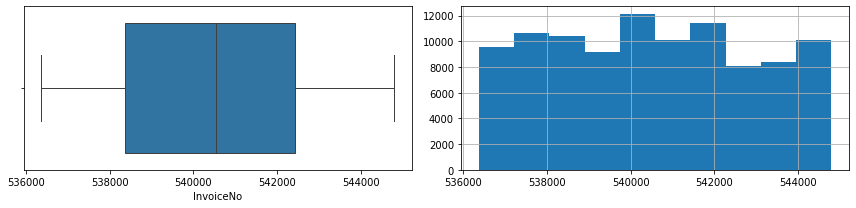

                                                     InvoiceNo                                                     


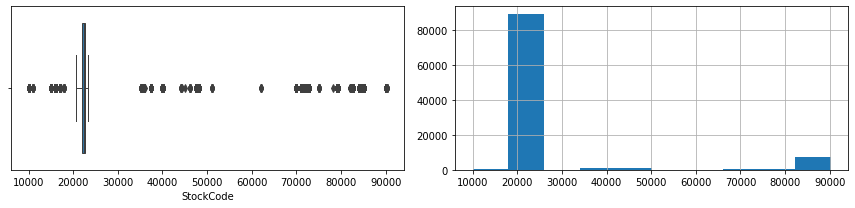

                                                     StockCode                                                     


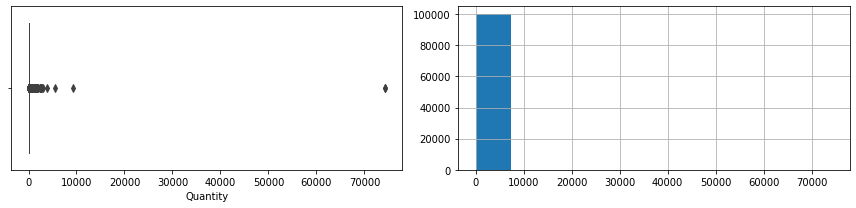

                                                      Quantity                                                     


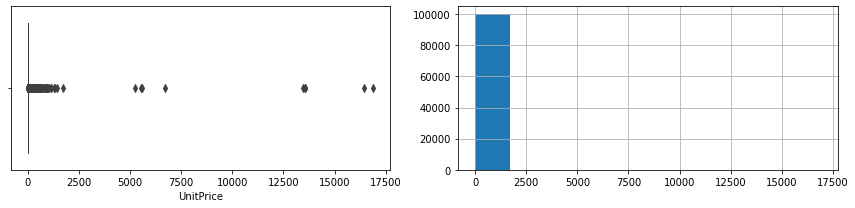

                                                     UnitPrice                                                     


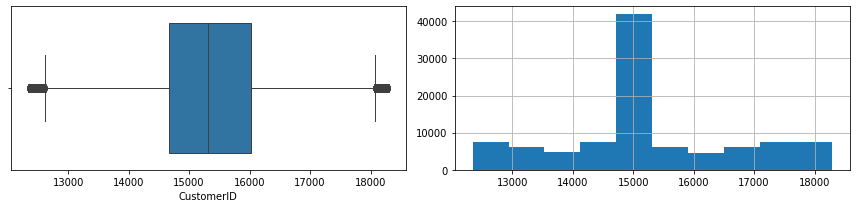

                                                     CustomerID                                                    


In [57]:
BOLD = '\033[1m'
END = '\033[0m'
for col in numcols:

    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,3))
    sns.boxplot(DS_2[col], linewidth=1, ax = ax1)
    DS_2[col].hist(ax = ax2)

    plt.tight_layout()
    plt.show()
    print(BOLD+col.center(115)+END)

No handles with labels found to put in legend.


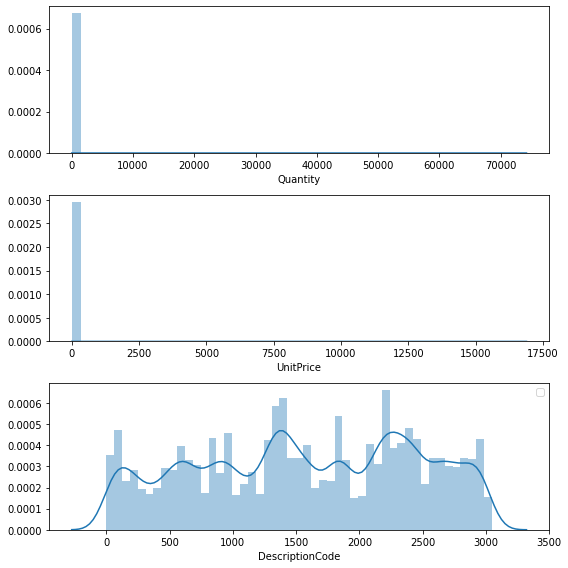

In [58]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
sns.distplot(DS_2["Quantity"], ax=ax1)
sns.distplot(DS_2["UnitPrice"], ax=ax2)
sns.distplot(DS_2["DescriptionCode"], ax=ax3)
plt.tight_layout()
plt.legend()

#### Feature Engineering

In [59]:
Q1 = DS_2_cluster.quantile(0.25)
Q3 = DS_2_cluster.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Quantity              8.0
UnitPrice             3.0
DescriptionCode    1459.0
dtype: float64


In [60]:
DS_2_clusters = DS_2_cluster[~((DS_2_cluster < (Q1 - 1.5 * IQR)) |(DS_2_cluster > (Q3 + 1.5 * IQR))).any(axis=1)]
DS_2_clusters

Quantity  UnitPrice  DescriptionCode
0             6       2.55             2910
1             6       3.39             2917
2             8       2.75              732
3             6       3.39             1453
4             6       3.39             2237
...         ...        ...              ...
99995        12       0.42              533
99996        12       0.42             1894
99997        12       0.42             2825
99998        12       0.42             2148
99999         6       0.85              517

[83606 rows x 3 columns]

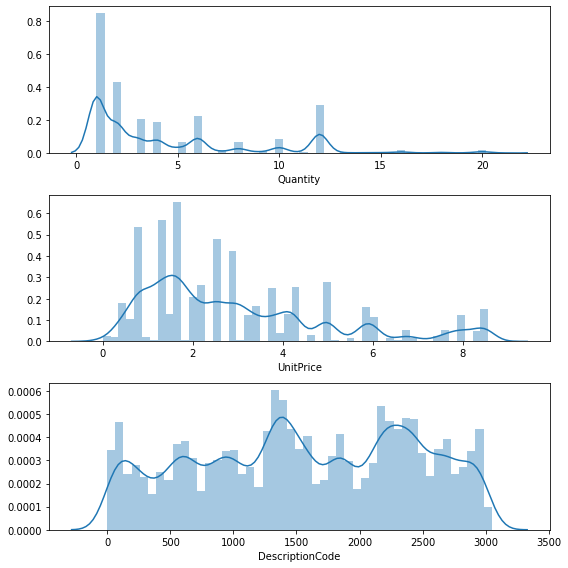

In [61]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
sns.distplot(DS_2_clusters["Quantity"], ax=ax1)
sns.distplot(DS_2_clusters["UnitPrice"], ax=ax2)
sns.distplot(DS_2_clusters["DescriptionCode"], ax=ax3)
plt.tight_layout()

In [62]:
#Fit and transform
DS_2_clusters.head()

Quantity  UnitPrice  DescriptionCode
0         6       2.55             2910
1         6       3.39             2917
2         8       2.75              732
3         6       3.39             1453
4         6       3.39             2237

In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(DS_2_clusters)

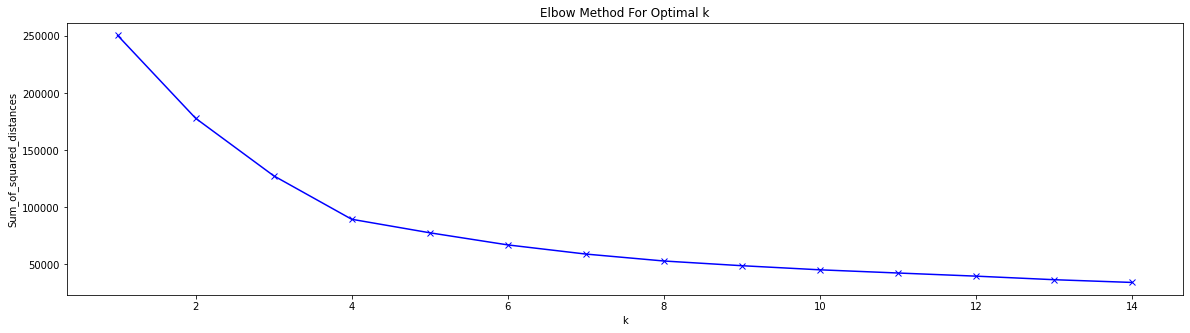

In [64]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cluster_scaled)
    Sum_of_squared_distances.append(km.inertia_)
plt.figure(figsize=(20,5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

K-Means


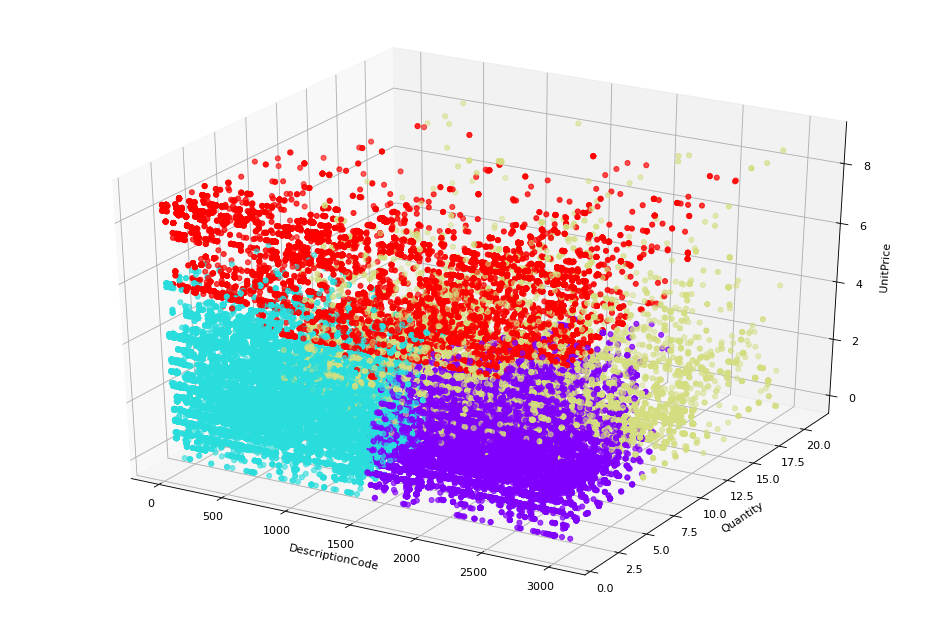

In [65]:
from mpl_toolkits.mplot3d import Axes3D

model = KMeans(n_clusters=4)
model.fit(cluster_scaled)
kmeans_labels = model.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(DS_2_clusters['DescriptionCode'],DS_2_clusters['Quantity'],DS_2_clusters['UnitPrice'],c=kmeans_labels, cmap='rainbow')

xLabel = ax.set_xlabel('DescriptionCode', linespacing=3.2)
yLabel = ax.set_ylabel('Quantity', linespacing=3.1)
zLabel = ax.set_zlabel('UnitPrice', linespacing=3.4)
print("K-Means")

In [66]:
DS2_clustered_kmeans = DS_2_clusters.assign(Cluster=kmeans_labels)
grouped_kmeans = DS2_clustered_kmeans.groupby(['Cluster']).mean().round(1)
grouped_kmeans

Quantity  UnitPrice  DescriptionCode
Cluster                                      
0             2.7        2.3           2293.4
1             2.7        2.5            777.2
2            12.1        1.6           1568.0
3             2.3        6.7           1611.3

K-Means


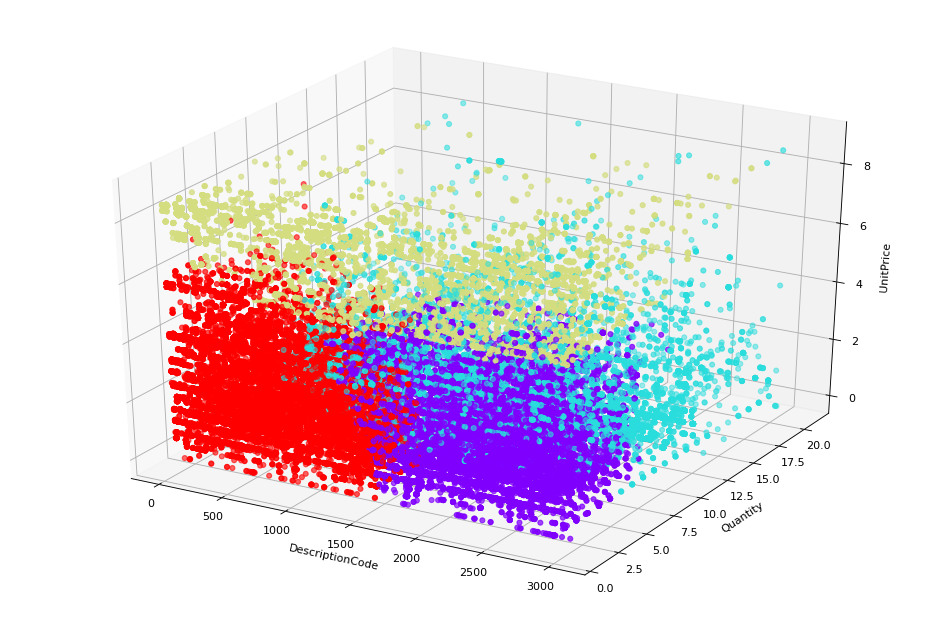

In [67]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=4,random_state=0,batch_size=6,max_iter=10).fit(cluster_scaled)
kmeans_labels = kmeans.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(DS_2_clusters['DescriptionCode'],DS_2_clusters['Quantity'],DS_2_clusters['UnitPrice'],c=kmeans_labels, cmap='rainbow')

xLabel = ax.set_xlabel('DescriptionCode', linespacing=3.2)
yLabel = ax.set_ylabel('Quantity', linespacing=3.1)
zLabel = ax.set_zlabel('UnitPrice', linespacing=3.4)
print("K-Means")

In [68]:
DS2_clustered_kmeans = DS_2_clusters.assign(Cluster=kmeans_labels)
grouped_kmeans = DS2_clustered_kmeans.groupby(['Cluster']).mean().round(1)
grouped_kmeans

Quantity  UnitPrice  DescriptionCode
Cluster                                      
0             2.6        2.6           2206.8
1            11.9        1.6           1591.5
2             2.3        7.2           1611.5
3             2.7        2.4            726.1